In [1]:
import pandas as pd
import numpy as np

In [53]:
# Cargar la matriz de FST
fst_matrix = pd.DataFrame({
    "CROZ": [0, 0.042695, 0.12678, 0.27831, 0.32882, 0.26909, 0.27057, 0.26667, 0.26795],
    "MARI": [np.nan, 0, 0.1315, 0.28179, 0.33146, 0.27277, 0.27435, 0.27098, 0.27193],
    "KERG": [np.nan, np.nan, 0, 0.18502, 0.22734, 0.17873, 0.17994, 0.17641, 0.17708],
    "FALK": [np.nan, np.nan, np.nan, 0, 0.076527, 0.1675, 0.16943, 0.16604, 0.16621],
    "MRTI": [np.nan, np.nan, np.nan, np.nan, 0, 0.2168, 0.21899, 0.21476, 0.21508],
    "SIGN": [np.nan, np.nan, np.nan, np.nan, np.nan, 0, 0.020684, 0.016454, 0.017172],
    "OHIG": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, 0.012482, 0.016436],
    "KING": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, 0.011809],
    "GGV": [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0]
}, index=["CROZ", "MARI", "KERG", "FALK", "MRTI", "SIGN", "OHIG", "KING", "GGV"])




In [54]:
# Aplicar la fórmula para calcular Nm
nm_matrix = fst_matrix.applymap(lambda fst: (1 - fst) / (4 * fst) if fst > 0 else np.inf)

In [55]:
# Mostrar la matriz resultante
print(nm_matrix)

          CROZ      MARI      KERG      FALK      MRTI       SIGN       OHIG  \
CROZ       inf       inf       inf       inf       inf        inf        inf   
MARI  5.605487       inf       inf       inf       inf        inf        inf   
KERG  1.721920  1.651141       inf       inf       inf        inf        inf   
FALK  0.648279  0.637185  1.101205       inf       inf        inf        inf   
MRTI  0.510294  0.504239  0.849674  3.016821       inf        inf        inf   
SIGN  0.679057  0.666523  1.148758  1.242537  0.903137        inf        inf   
OHIG  0.673975  0.661245  1.139352  1.225536  0.891605  11.836637        inf   
KING  0.687488  0.672577  1.167153  1.255661  0.914090  14.943874  19.778842   
GGV   0.683010  0.669354  1.161791  1.254121  0.912358  14.308584  14.960514   

           KING  GGV  
CROZ        inf  inf  
MARI        inf  inf  
KERG        inf  inf  
FALK        inf  inf  
MRTI        inf  inf  
SIGN        inf  inf  
OHIG        inf  inf  
KING        inf

In [56]:
# Mostrar matrices individuales de FST y Nm
print("Matriz de FST:")
print(fst_matrix)

print("\nMatriz de Nm:")
print(nm_matrix)


Matriz de FST:
          CROZ     MARI     KERG      FALK     MRTI      SIGN      OHIG  \
CROZ  0.000000      NaN      NaN       NaN      NaN       NaN       NaN   
MARI  0.042695  0.00000      NaN       NaN      NaN       NaN       NaN   
KERG  0.126780  0.13150  0.00000       NaN      NaN       NaN       NaN   
FALK  0.278310  0.28179  0.18502  0.000000      NaN       NaN       NaN   
MRTI  0.328820  0.33146  0.22734  0.076527  0.00000       NaN       NaN   
SIGN  0.269090  0.27277  0.17873  0.167500  0.21680  0.000000       NaN   
OHIG  0.270570  0.27435  0.17994  0.169430  0.21899  0.020684  0.000000   
KING  0.266670  0.27098  0.17641  0.166040  0.21476  0.016454  0.012482   
GGV   0.267950  0.27193  0.17708  0.166210  0.21508  0.017172  0.016436   

          KING  GGV  
CROZ       NaN  NaN  
MARI       NaN  NaN  
KERG       NaN  NaN  
FALK       NaN  NaN  
MRTI       NaN  NaN  
SIGN       NaN  NaN  
OHIG       NaN  NaN  
KING  0.000000  NaN  
GGV   0.011809  0.0  

Matriz de Nm:

In [57]:
# Crear una copia de la matriz de Nm para reorganizar sus valores
nm_matrix_upper = nm_matrix.copy()

# Mover los valores de Nm por debajo de la diagonal a la parte superior
for i in range(len(nm_matrix)):
    for j in range(len(nm_matrix)):
        if i > j:  # Si está debajo de la diagonal
            nm_matrix_upper.iloc[j, i] = nm_matrix.iloc[i, j]  # Mover arriba

# Reemplazar valores debajo de la diagonal con NaN para evitar duplicados
for i in range(len(nm_matrix)):
    for j in range(len(nm_matrix)):
        if i > j:
            nm_matrix_upper.iloc[i, j] = np.nan

# Revisar la matriz reorganizada
print("\nMatriz reorganizada de Nm (sobre la diagonal):")
print(nm_matrix_upper)



Matriz reorganizada de Nm (sobre la diagonal):
      CROZ      MARI      KERG      FALK      MRTI      SIGN       OHIG  \
CROZ   inf  5.605487  1.721920  0.648279  0.510294  0.679057   0.673975   
MARI   NaN       inf  1.651141  0.637185  0.504239  0.666523   0.661245   
KERG   NaN       NaN       inf  1.101205  0.849674  1.148758   1.139352   
FALK   NaN       NaN       NaN       inf  3.016821  1.242537   1.225536   
MRTI   NaN       NaN       NaN       NaN       inf  0.903137   0.891605   
SIGN   NaN       NaN       NaN       NaN       NaN       inf  11.836637   
OHIG   NaN       NaN       NaN       NaN       NaN       NaN        inf   
KING   NaN       NaN       NaN       NaN       NaN       NaN        NaN   
GGV    NaN       NaN       NaN       NaN       NaN       NaN        NaN   

           KING        GGV  
CROZ   0.687488   0.683010  
MARI   0.672577   0.669354  
KERG   1.167153   1.161791  
FALK   1.255661   1.254121  
MRTI   0.914090   0.912358  
SIGN  14.943874  14.308584 

In [58]:
print("Índices FST:", fst_matrix.index)
print("Índices Nm:", nm_matrix_upper.index)
print("\nColumnas FST:", fst_matrix.columns)
print("Columnas Nm:", nm_matrix_upper.columns)


Índices FST: Index(['CROZ', 'MARI', 'KERG', 'FALK', 'MRTI', 'SIGN', 'OHIG', 'KING', 'GGV'], dtype='object')
Índices Nm: Index(['CROZ', 'MARI', 'KERG', 'FALK', 'MRTI', 'SIGN', 'OHIG', 'KING', 'GGV'], dtype='object')

Columnas FST: Index(['CROZ', 'MARI', 'KERG', 'FALK', 'MRTI', 'SIGN', 'OHIG', 'KING', 'GGV'], dtype='object')
Columnas Nm: Index(['CROZ', 'MARI', 'KERG', 'FALK', 'MRTI', 'SIGN', 'OHIG', 'KING', 'GGV'], dtype='object')


In [59]:
print("Matriz de FST:")
print(fst_matrix)

Matriz de FST:
          CROZ     MARI     KERG      FALK     MRTI      SIGN      OHIG  \
CROZ  0.000000      NaN      NaN       NaN      NaN       NaN       NaN   
MARI  0.042695  0.00000      NaN       NaN      NaN       NaN       NaN   
KERG  0.126780  0.13150  0.00000       NaN      NaN       NaN       NaN   
FALK  0.278310  0.28179  0.18502  0.000000      NaN       NaN       NaN   
MRTI  0.328820  0.33146  0.22734  0.076527  0.00000       NaN       NaN   
SIGN  0.269090  0.27277  0.17873  0.167500  0.21680  0.000000       NaN   
OHIG  0.270570  0.27435  0.17994  0.169430  0.21899  0.020684  0.000000   
KING  0.266670  0.27098  0.17641  0.166040  0.21476  0.016454  0.012482   
GGV   0.267950  0.27193  0.17708  0.166210  0.21508  0.017172  0.016436   

          KING  GGV  
CROZ       NaN  NaN  
MARI       NaN  NaN  
KERG       NaN  NaN  
FALK       NaN  NaN  
MRTI       NaN  NaN  
SIGN       NaN  NaN  
OHIG       NaN  NaN  
KING  0.000000  NaN  
GGV   0.011809  0.0  


In [60]:
for i in range(len(combined_matrix)):
    for j in range(len(combined_matrix)):
        if i < j:
            print(f"Asignando Nm ({nm_matrix_upper.iloc[i, j]}) en posición ({i}, {j})")
        elif i > j:
            print(f"Asignando FST ({fst_matrix.iloc[i, j]}) en posición ({i}, {j})")


Asignando Nm (5.605486590935707) en posición (0, 1)
Asignando Nm (1.7219198611768418) en posición (0, 2)
Asignando Nm (0.6482788976321368) en posición (0, 3)
Asignando Nm (0.5102943859862539) en posición (0, 4)
Asignando Nm (0.6790571927607864) en posición (0, 5)
Asignando Nm (0.67397531137968) en posición (0, 6)
Asignando Nm (0.6874882813964825) en posición (0, 7)
Asignando Nm (0.6830098899048329) en posición (0, 8)
Asignando FST (0.042695) en posición (1, 0)
Asignando Nm (1.6511406844106464) en posición (1, 2)
Asignando Nm (0.6371854927428228) en posición (1, 3)
Asignando Nm (0.5042388221806553) en posición (1, 4)
Asignando Nm (0.6665230780511053) en posición (1, 5)
Asignando Nm (0.6612447603426281) en posición (1, 6)
Asignando Nm (0.6725773119787438) en posición (1, 7)
Asignando Nm (0.669354245577906) en posición (1, 8)
Asignando FST (0.12678) en posición (2, 0)
Asignando FST (0.1315) en posición (2, 1)
Asignando Nm (1.1012052751053942) en posición (2, 3)
Asignando Nm (0.84967449634

In [61]:
# Asegurarse de que ambas matrices tengan el mismo orden
order = fst_matrix.index  # Usa el orden de `fst_matrix` como referencia
nm_matrix_upper = nm_matrix_upper.loc[order, order]


In [62]:
# Establecer la diagonal principal de FST en 0
np.fill_diagonal(fst_matrix.values, 0)

# Establecer la diagonal principal de Nm en NaN
np.fill_diagonal(nm_matrix_upper.values, np.nan)


In [63]:
# Crear una copia de fst_matrix para combinar
combined_matrix = fst_matrix.copy()

# Asignar valores de Nm por encima de la diagonal y FST por debajo
for i in range(len(combined_matrix)):
    for j in range(len(combined_matrix)):
        if i < j:  # Por encima de la diagonal: Nm
            combined_matrix.iloc[i, j] = nm_matrix_upper.iloc[i, j]
        elif i > j:  # Por debajo de la diagonal: FST
            combined_matrix.iloc[i, j] = fst_matrix.iloc[i, j]


In [64]:
combined_matrix

,CROZ,MARI,KERG,FALK,MRTI,SIGN,OHIG,KING,GGV
CROZ,0.000000,5.605487,1.721920,0.648279,0.510294,0.679057,0.673975,0.687488,0.683010
MARI,0.042695,0.000000,1.651141,0.637185,0.504239,0.666523,0.661245,0.672577,0.669354
KERG,0.126780,0.131500,0.000000,1.101205,0.849674,1.148758,1.139352,1.167153,1.161791
FALK,0.278310,0.281790,0.185020,0.000000,3.016821,1.242537,1.225536,1.255661,1.254121
MRTI,0.328820,0.331460,0.227340,0.076527,0.000000,0.903137,0.891605,0.914090,0.912358
SIGN,0.269090,0.272770,0.178730,0.167500,0.216800,0.000000,11.836637,14.943874,14.308584
OHIG,0.270570,0.274350,0.179940,0.169430,0.218990,0.020684,0.000000,19.778842,14.960514
KING,0.266670,0.270980,0.176410,0.166040,0.214760,0.016454,0.012482,0.000000,20.920294
GGV,0.267950,0.271930,0.177080,0.166210,0.215080,0.017172,0.016436,0.011809,0.000000


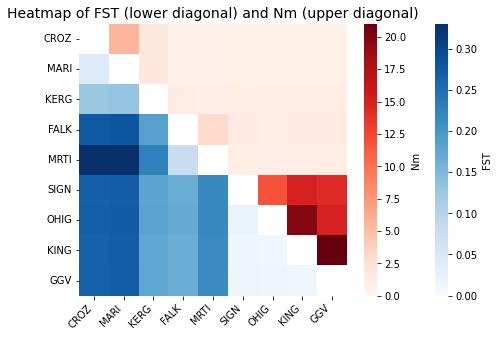

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Asegurarnos de que las diagonales principales estén definidas
np.fill_diagonal(fst_matrix.values, np.nan)  # FST en la diagonal: np.nan para excluirla
np.fill_diagonal(nm_matrix_upper.values, np.nan)  # Nm en la diagonal: np.nan para excluirla

# Máscaras para FST y Nm
mask_fst = np.zeros_like(fst_matrix, dtype=bool)
mask_nm = np.zeros_like(nm_matrix_upper, dtype=bool)

# Máscaras para evitar la superposición
for i in range(len(fst_matrix)):
    for j in range(len(fst_matrix)):
        if i <= j:  # Encima de la diagonal y diagonal principal
            mask_fst[i, j] = True
        if i >= j:  # Debajo de la diagonal y diagonal principal
            mask_nm[i, j] = True

# Crear la figura
fig, ax = plt.subplots(figsize=(7.5, 5))

# Heatmap para FST (debajo de la diagonal, escala: 0-0.5)
#sns.heatmap(fst_matrix, mask=mask_fst, cmap="Blues", vmin=0, vmax=0.33, annot=False,
#            cbar_kws={'label': 'FST', 'shrink': 1, 'aspect': 20}, linewidths=0.5, linecolor='white', ax=ax)
sns.heatmap(fst_matrix, mask=mask_fst, cmap="Blues", vmin=0, vmax=0.33, annot=False,
            cbar_kws={'label': 'FST', 'shrink': 1, 'aspect': 20})

# Heatmap para Nm (encima de la diagonal, escala: 0-21)
#sns.heatmap(nm_matrix_upper, mask=mask_nm, cmap="Reds", vmin=0, vmax=21, annot=False,
#            cbar_kws={'label': 'Nm', 'shrink': 1, 'aspect': 20}, linewidths=0.5, linecolor='white', ax=ax)
sns.heatmap(nm_matrix_upper, mask=mask_nm, cmap="Reds", vmin=0, vmax=21, annot=False,
            cbar_kws={'label': 'Nm', 'shrink': 1, 'aspect': 20})

# Configurar etiquetas y título
ax.set_xticklabels(fst_matrix.columns, rotation=45, ha="right")
ax.set_yticklabels(fst_matrix.index, rotation=0)
ax.set_title("Heatmap of FST (lower diagonal) and Nm (upper diagonal)", fontsize=14)

# Guardar como PDF
plt.savefig("heatmap_fst_nm_scaled.pdf", format="pdf", bbox_inches="tight")

# Mostrar el gráfico
plt.show()

# Cerrar la figura
plt.close()